# **Retail Sales EDA in SQL**

This **[Retail Sales Dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data)** is a snapshot of a fictional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as `Transaction ID`, `Date`, `Customer ID`, `Gender`, `Age`, `Product Category`, `Quantity`, `Price per Unit`, and `Total Amount`.

These are the analyses I will perform:

* Analysis 1: Customer`Age`, `Gender`, and Purchasing Behaviour
* Analysis 2: Top `Product Category` for each `Age` and `Gender`
* Analysis 3: Customer Purchases by `Quantity`, `Age`, `Gender`, and `Product Category`
* Analysis 4: `Price per Unit` Comparison by `Product Category`

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3  # for using SQL commands

In [2]:
# Load the dataset
retail_data = pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

df = retail_data.copy() # make a copy of the original data
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Data Cleaning

Since this particular dataset has **No Missing values**, I will confirm if there are unexpected values by checking for *unique values* in each column and identifying potential *outliers*

Yes, the analyses will eventually be performed using ***SQL commands***. To me, Data Cleaning is easier in Python. Please reach out if you have any cheat sheet or effective ways to clean data using SQL

In [3]:
df.info()  # 1000 rows and 9 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
# Rename column names by replacing spaces with underscores 

def rename_columns(df):
  """Renames columns in a DataFrame by replacing spaces with underscores.

  Args:
      df: The DataFrame to rename the columns of.

  Returns:
      A new DataFrame with the renamed columns.
  """
  df.columns = [col.replace(' ', '_') for col in df.columns]
  return df

df = rename_columns(df.copy())
df.head()

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
# Date column is an object. Convert to datetime dtype to enable Date specific analyses
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer_ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product_Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price_per_Unit    1000 non-null   int64         
 8   Total_Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
# Check for missing values
df.isnull().sum()  # There are No missing values

Transaction_ID      0
Date                0
Customer_ID         0
Gender              0
Age                 0
Product_Category    0
Quantity            0
Price_per_Unit      0
Total_Amount        0
dtype: int64

In [8]:
# Check for unique values in all columns
df.nunique()

Transaction_ID      1000
Date                 345
Customer_ID         1000
Gender                 2
Age                   47
Product_Category       3
Quantity               4
Price_per_Unit         5
Total_Amount          18
dtype: int64

From the output above:
* There are 1000 distinct Transaction IDs and 1000 distinct Customers (Customer ID)s
* Since there are only 345 unique dates, some customers likely made purchases on the same dates
* The Product categories are only *Beauty*, *Clothing* and *Electronics*

In [9]:
df.describe() # descriptive statistics

,Transaction_ID,Date,Age,Quantity,Price_per_Unit,Total_Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


# Connect to a Database and convert the Cleaned Dataframe to a Table

In [10]:
# Connect to the database
conn = sqlite3.connect('retail_data.db')

In [11]:
# Create 'retail' table
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='retail'")
table_exists = len(cursor.fetchall()) > 0

if not table_exists:
  # Load data to 'retail' table only if it doesn't exist
  df.to_sql('retail', conn, index=False)
  print("Table 'retail' created and data loaded successfully.")
else:
  print("Table 'retail' already exists. Skipping data loading.")

Table 'retail' created and data loaded successfully.


In [12]:
# Now I will use SQL commands to perform analysis on the 'retail_sales' table
# pd.read_sql_query is an optimized approach for working with pandas and sqlite3

# Inspect the first_10_rows
first_10_rows = pd.read_sql_query("""SELECT *
                                   FROM retail
                                   LIMIT 10;""", conn)
first_10_rows

,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount
0,1,2023-11-24 00:00:00,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27 00:00:00,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13 00:00:00,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21 00:00:00,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06 00:00:00,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25 00:00:00,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13 00:00:00,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22 00:00:00,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13 00:00:00,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07 00:00:00,CUST010,Female,52,Clothing,4,50,200


# Analysis 1: Customer Age, Gender, and Purchasing Behaviour

# Total spending for each combination of Age and Gender

In [13]:
# Group by Age and Gender, calculate Total Spending
customer_purchase_behavior = pd.read_sql_query("""
SELECT Age, Gender, SUM(Total_Amount) AS Total_Spent_by_Age_Gender
FROM retail
GROUP BY Age, Gender
ORDER BY Age, Gender;
""", conn)

# Use .pivot_table function to create a pivot table with separate columns for Female and Male
gender_spending_pivot = customer_purchase_behavior.pivot_table(
    values='Total_Spent_by_Age_Gender', index='Age', columns='Gender', aggfunc='sum')

gender_spending_pivot

Gender,Female,Male
Age,,
18,7940,3275
19,7335,7535
20,5175,3470
21,5400,7185
22,5425,8275
23,2895,5325
24,1750,3665
25,3550,6350
26,10375,3605


# Insights from Analysis 1

Analysis 1 shows how Total spending varies with `Age` and `Gender`

For example: For 20 year olds, Females collectively spent **more** than Males. The opposite is shown for 63 year olds, and so on.

From the Barplot below, you see that **39 year olds** collectively spent the **least** while **43 year olds** spent the **most**

# Barplot of Total Spending by Age and Gender

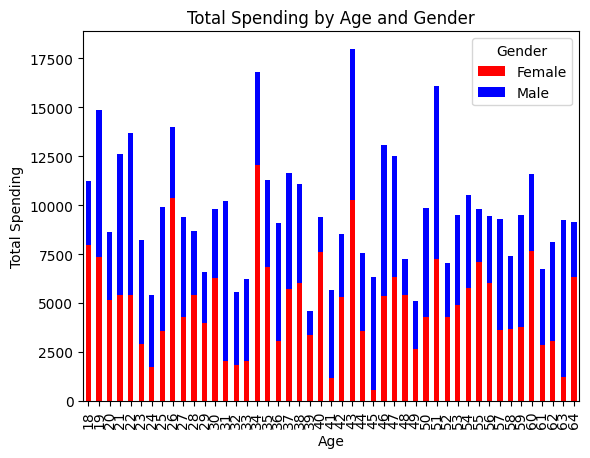

In [14]:
# Stacked Barplot
gender_spending_pivot.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title('Total Spending by Age and Gender')
plt.ylabel('Total Spending')
plt.xlabel('Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

# Analysis 2: Top Product Categories for each Age and Gender

In [15]:
# Group by Age and Gender, Product category (PC)
top_product_category = pd.read_sql_query("""
SELECT Age, Gender, Product_Category, SUM(Total_Amount) AS Total_Spent_by_Age_Gender_PC  
FROM retail
GROUP BY Age, Gender, Product_Category
ORDER BY Age, Gender, Product_Category;
""", conn)

top_product_pivot= top_product_category.pivot_table(values= 'Total_Spent_by_Age_Gender_PC', index= ['Age','Gender']
                                                    , columns= 'Product_Category', aggfunc= 'sum')

print(top_product_pivot.to_string())

Product_Category  Beauty  Clothing  Electronics
Age Gender                                     
18  Female        3195.0    2575.0       2170.0
    Male          1765.0    1510.0          NaN
19  Female        2225.0    1200.0       3910.0
    Male          2140.0    1530.0       3865.0
20  Female         365.0      80.0       4730.0
    Male          2160.0     360.0        950.0
21  Female        3300.0    1200.0        900.0
    Male          4700.0    1885.0        600.0
22  Female        1300.0    3275.0        850.0
    Male          4230.0    2075.0       1970.0
23  Female         475.0    1270.0       1150.0
    Male           165.0    3050.0       2110.0
24  Female        1575.0      25.0        150.0
    Male          1310.0    2125.0        230.0
25  Female        1000.0    2200.0        350.0
    Male          1375.0    2150.0       2825.0
26  Female        1715.0    6960.0       1700.0
    Male             NaN    1775.0       1830.0
27  Female        1300.0    2655.0      

# Insights from Analysis 2

Analysis 2 helps to identify **Trends in Customer Spending behaviour** based on `Age`, `Gender`, and `Product Category`

The insights:

* Age Preferences: Spending habits change with Age for certain Product Categories
* Gender Differences: There are significant differences in spending patterns between Genders for specific Product Categories

For a larger Real-life dataset, using such analysis can help to refine the **Target Audience for Marketing Campaigns**. Specific Age groups and Genders have a higher propensity to spend on certain Product Categories

# Analysis 3: Customer Purchases by Quantity

Customer Purchases by Quantity is grouped by ***Age***, ***Gender***, and ***Product Category***

In [16]:
# Group by Age, Gender and Product Category 
customer_purchase_by_quantity = pd.read_sql_query("""
SELECT Age, Gender, Product_Category, Quantity
FROM retail
GROUP BY Age, Gender, Product_Category
ORDER BY Age, Gender, Product_Category;
""", conn)

quantity_pivot = customer_purchase_by_quantity.pivot_table(values= 'Quantity', index= ['Age','Gender'], 
                                                           columns= 'Product_Category', aggfunc= 'sum')

print(quantity_pivot.to_string())

Product_Category  Beauty  Clothing  Electronics
Age Gender                                     
18  Female           3.0       3.0          1.0
    Male             2.0       2.0          NaN
19  Female           1.0       4.0          2.0
    Male             3.0       3.0          2.0
20  Female           1.0       1.0          4.0
    Male             2.0       2.0          3.0
21  Female           2.0       4.0          3.0
    Male             4.0       3.0          2.0
22  Female           4.0       1.0          2.0
    Male             4.0       3.0          3.0
23  Female           1.0       1.0          2.0
    Male             2.0       2.0          1.0
24  Female           3.0       1.0          4.0
    Male             2.0       1.0          1.0
25  Female           4.0       2.0          1.0
    Male             1.0       4.0          1.0
26  Female           1.0       2.0          2.0
    Male             NaN       4.0          3.0
27  Female           3.0       4.0      

# Insights from Analysis 3

Analysis 3 can help answer these questions:

* Purchase Patterns by Age and Gender: For example, are there any Age groups or Genders that consistently purchase more of a  particular Product category?
* Popular Product Categories: You can identify which Product Categories are generally purchased the most across different Age and Gender groups.
* Variations in Purchases: You can see if there are any significant variations in purchase quantities for the same Product Category across different Age and Gender groups. For instance, does the purchase of Electronics increase or decrease with Age for a particular Gender?

**Actionable insights**:

Imagine the analysis reveals that young females (18-24) consistently purchase more beauty products than other demographics *(this is an example)*. This can inform several decisions:

* Inventory: The store can stock a wider variety of beauty products and maintain higher inventory levels for this category.
* Promotions: They can run targeted promotions or offer loyalty rewards for beauty product purchases.
* Store Layout: Beauty products could be placed in a prominent location on the first floor, readily accessible to young female customers.

By leveraging the insights from purchase quantity analysis, retail companies can make data-driven decisions that **Optimize Inventory management**, **Product Development**, **Marketing strategies**, and ultimately, increase sales and customer satisfaction.

# Analysis 4: Price per Unit Comparison by Product Category

In [17]:
# Average price per category
average_price_per_category = pd.read_sql_query("""
SELECT Product_Category, AVG(Price_per_Unit) AS Average_Price
FROM retail
GROUP BY Product_Category;""",conn)

# Round the 'Average_Price' column to 2 decimals
average_price_per_category['Average_Price'] = average_price_per_category['Average_Price'].round(2)

print(average_price_per_category.to_string(index=False))
print() # leave empty line

# Price range per Product Category
price_range_per_category = pd.read_sql_query("""
SELECT Product_Category, MIN(Price_per_Unit) AS Min_Price, MAX(Price_per_Unit) AS Max_Price
FROM retail
GROUP BY Product_Category;""",conn)

print(price_range_per_category.to_string(index=False))

Product_Category  Average_Price
          Beauty         184.06
        Clothing         174.29
     Electronics         181.90

Product_Category  Min_Price  Max_Price
          Beauty         25        500
        Clothing         25        500
     Electronics         25        500


# Insights from Analysis 4

Analysis 4 helps understand the **Average Price, and Price Range for each Product Category**

This helps inform decisions based on:

* Pricing Strategies: When setting prices for new products, retailers can consider the average price point of the category to ensure their products are competitively priced. In this case, Beauty products have the highest Average price.
* Product Assortment: The significant difference between the minimum and maximum prices for each category (e.g., Electronics: 25 - 500) implies that the retailer offers a variety of products within each category at different price points. This allows customers to choose based on their needs and budget.

In [18]:
# Close the connection
conn.commit()  # Save changes (if any)
conn.close()

I use the same dataset from these analyses, to perform **[Retail Sales EDA in Python](https://www.kaggle.com/code/wilfridawere/retail-sales-eda-in-python)**

Feel free to Contact me for any changes and feedback

***Explore and be teachable***